In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
import pandas as pd
import gensim as gs
import numpy as np

In [135]:
dataset = pd.read_csv("./insurance_QA_train.csv", sep=";")

In [136]:
dataset.head()

,Question,Answer
0,be Life Insurance exempt from creditor in Conn...,provided that you have name a primarybeneficia...
1,which country have the good retirement plan?,not many sovereign nation have retirement plan...
2,how do I purchase homeowner insurance?,it simple really contact a broker like myself ...
3,when be Medicare primary or secondary?,the factor that determine whether Medicare be ...
4,do smoking void Life Insurance?,if you buy a life insurance policy as a nonsmo...


In [137]:
from keras.preprocessing.text import Tokenizer

In [138]:
from nltk.stem import SnowballStemmer
import nltk
pd.options.mode.chained_assignment = None  # default='warn'

In [139]:
toktok = nltk.tokenize.toktok.ToktokTokenizer()
stop = nltk.corpus.stopwords.words('english')

In [140]:
dataset['AnswerTok'] = dataset['Answer'].apply(toktok.tokenize)
dataset['AnswerTokStop'] = dataset['AnswerTok'].apply(lambda x: [word for word in x if word not in stop])

In [141]:
dataset.head()

,Question,Answer,AnswerTok,AnswerTokStop
0,be Life Insurance exempt from creditor in Conn...,provided that you have name a primarybeneficia...,"[provided, that, you, have, name, a, primarybe...","[provided, name, primarybeneficiary, life, pol..."
1,which country have the good retirement plan?,not many sovereign nation have retirement plan...,"[not, many, sovereign, nation, have, retiremen...","[many, sovereign, nation, retirement, plan, su..."
2,how do I purchase homeowner insurance?,it simple really contact a broker like myself ...,"[it, simple, really, contact, a, broker, like,...","[simple, really, contact, broker, like, licens..."
3,when be Medicare primary or secondary?,the factor that determine whether Medicare be ...,"[the, factor, that, determine, whether, Medica...","[factor, determine, whether, Medicare, primary..."
4,do smoking void Life Insurance?,if you buy a life insurance policy as a nonsmo...,"[if, you, buy, a, life, insurance, policy, as,...","[buy, life, insurance, policy, nonsmoker, legi..."


In [142]:
sentences = dataset['AnswerTokStop'].values

In [143]:
model = gs.models.Word2Vec(sentences, min_count=40)

In [144]:
model.wv.get_vector('medical')

array([-3.0391872e-01, -4.0259063e-02, -5.0038373e-01, -3.2221457e-01,
       -2.4400483e-01,  4.6724480e-01,  5.9797513e-01,  1.2166169e+00,
        1.3511615e+00, -8.5258342e-02, -1.3196304e+00,  1.7724092e-01,
        1.0661708e+00, -2.2433572e+00, -2.6280320e-01, -1.1862894e+00,
        8.2861203e-01, -3.5324365e-01, -3.8553450e-01, -5.9117705e-01,
       -6.5829033e-01, -1.1717794e+00,  5.7562214e-01,  2.8608108e-01,
       -1.3644720e+00, -1.4868903e+00,  6.3115996e-01, -1.4147116e+00,
       -6.3579988e-01, -8.8152152e-01, -1.2398890e+00, -5.9847677e-01,
        1.1743565e+00, -6.7230558e-01, -9.1903585e-01, -5.0652307e-01,
       -1.1967834e+00, -4.6847853e-01, -2.3540935e-01,  5.3406179e-01,
       -2.1591897e-01,  1.2182440e+00, -1.1036173e+00, -1.1764721e+00,
        7.8155768e-01, -5.8013022e-01,  3.1921830e+00, -1.3905989e+00,
        6.8527853e-01,  5.4264325e-01,  3.9141381e-01, -1.5367045e+00,
        2.4271775e-02,  1.6315511e+00, -3.0491881e+00,  7.1740210e-02,
      

In [145]:
model.wv.most_similar('maternity',topn=10)

[('mental', 0.8450204730033875),
 ('preventive', 0.7479002475738525),
 ('VA', 0.7473461031913757),
 ('dental', 0.7416678667068481),
 ('vision', 0.7289652228355408),
 ('longer', 0.7070941925048828),
 ('kick', 0.686384379863739),
 ('skilled', 0.6829015612602234),
 ('childbirth', 0.6823986768722534),
 ('routine', 0.6770808696746826)]

In [146]:
model.wv.most_similar('man',topn=5)

[('woman', 0.8431228995323181),
 ('young', 0.765759289264679),
 ('adult', 0.756263017654419),
 ('perfect', 0.7224392890930176),
 ('decade', 0.7215998768806458)]

In [89]:
def analogy(x1, x2, y1):
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [90]:
analogy('woman', 'hospital', 'baby')

'inpatient'

In [91]:
analogy('nurse', 'hospital', 'baby')

'wait'

In [92]:
analogy('doctor', 'hospital', 'routine')

'inpatient'

In [93]:
analogy('man', 'woman', 'hospital')

'inpatient'

In [94]:
analogy('doctor', 'pregnancy', 'hospital')

'childbirth'

In [95]:
analogy('baby', 'chronic', 'hospital')

'therapy'

In [96]:
analogy('baby', 'woman', 'pregnancy')

'complication'

In [97]:
analogy('doctor', 'man', 'nursing')

'adult'

In [98]:
analogy('woman', 'childbirth', 'baby')

'maternity'

In [108]:
from sklearn.decomposition import PCA
# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [111]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(5,5))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

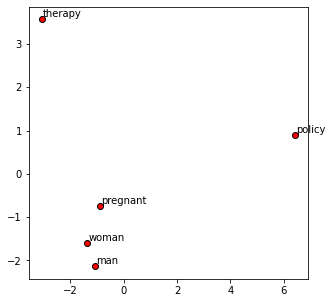

In [114]:
display_pca_scatterplot(model,['woman', 'man','policy', 'therapy', 'pregnant','hospital', 'baby' ])

In [115]:
dataset = pd.read_csv("./insurance_QA_train.csv", sep=";")

In [116]:
dataset.head()

,Question,Answer
0,be Life Insurance exempt from creditor in Conn...,provided that you have name a primarybeneficia...
1,which country have the good retirement plan?,not many sovereign nation have retirement plan...
2,how do I purchase homeowner insurance?,it simple really contact a broker like myself ...
3,when be Medicare primary or secondary?,the factor that determine whether Medicare be ...
4,do smoking void Life Insurance?,if you buy a life insurance policy as a nonsmo...


In [148]:
from keras.preprocessing.text import Tokenizer

In [149]:
from nltk.stem import SnowballStemmer
import nltk
pd.options.mode.chained_assignment = None  # default='warn'

In [150]:
toktok = nltk.tokenize.toktok.ToktokTokenizer()
stop = nltk.corpus.stopwords.words('english')

In [151]:
dataset['AnswerTok'] = dataset['Answer'].apply(toktok.tokenize)
dataset['AnswerTokStop'] = dataset['AnswerTok'].apply(lambda x: [word for word in x if word not in stop])

In [152]:
dataset.head()

,Question,Answer,AnswerTok,AnswerTokStop
0,be Life Insurance exempt from creditor in Conn...,provided that you have name a primarybeneficia...,"[provided, that, you, have, name, a, primarybe...","[provided, name, primarybeneficiary, life, pol..."
1,which country have the good retirement plan?,not many sovereign nation have retirement plan...,"[not, many, sovereign, nation, have, retiremen...","[many, sovereign, nation, retirement, plan, su..."
2,how do I purchase homeowner insurance?,it simple really contact a broker like myself ...,"[it, simple, really, contact, a, broker, like,...","[simple, really, contact, broker, like, licens..."
3,when be Medicare primary or secondary?,the factor that determine whether Medicare be ...,"[the, factor, that, determine, whether, Medica...","[factor, determine, whether, Medicare, primary..."
4,do smoking void Life Insurance?,if you buy a life insurance policy as a nonsmo...,"[if, you, buy, a, life, insurance, policy, as,...","[buy, life, insurance, policy, nonsmoker, legi..."


In [153]:
sentences = dataset['AnswerTokStop'].values

In [154]:
model = gs.models.Word2Vec(sentences, min_count=140)

In [155]:
model.wv.get_vector('insurance')

array([-0.20221938, -0.02374227,  0.4294325 ,  0.72575134, -0.12481324,
       -0.45833498,  0.19245708, -0.2845943 , -1.0363452 , -0.33642387,
        0.8977222 , -0.67270035,  0.08350114,  0.93273145, -0.5910558 ,
        0.39305586,  0.5037639 ,  0.44427443, -1.3483157 , -0.6869313 ,
        0.30205348,  0.07534172,  0.06023426,  0.10376425,  0.50570595,
       -0.4544424 , -0.21950695,  0.2685764 , -0.5786718 , -0.608981  ,
       -1.1492242 , -1.0265621 ,  0.5462844 , -0.4871827 ,  0.2656727 ,
       -0.1407572 ,  0.7746882 , -0.20191108,  0.32446375, -0.9067844 ,
       -0.30964234,  1.4619209 , -0.14520052,  0.0084077 , -0.3684978 ,
        0.43051106, -0.12975416,  0.7816395 ,  0.3667818 ,  1.000025  ,
       -0.54624367, -0.02331143,  0.2547281 ,  0.16231187, -0.06767589,
       -0.01727659,  0.96018034, -0.5777775 , -0.15331484,  0.7080603 ,
        0.23067361,  0.5886484 ,  0.3721311 , -0.9512438 ,  1.0719564 ,
        0.55645806,  0.01477952,  0.09041067, -0.92767096,  0.27

In [156]:
model.wv.most_similar('insurance',topn=5)

[('sell', 0.5496290922164917),
 ('policy', 0.4301226735115051),
 ('multiple', 0.4293840527534485),
 ('purchase', 0.39120593667030334),
 ('directly', 0.36383503675460815)]